In [1]:
'''Clustering tasks''' 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
'''Task1 - To group customers with similar spending power.''' 

''' Read orders dataset '''
orders_df = pd.read_csv('D:\IML Assignments\project\CS412_IML/data/olist_orders_dataset.csv')
orders_df = orders_df[['order_id', 'customer_id']]
#len(orders_df)

In [3]:
''' Read payments dataset '''
payments_df = pd.read_csv('D:\IML Assignments\project\CS412_IML/data/olist_order_payments_dataset.csv')
payments_df = payments_df[['order_id','payment_value']]
#len(payments_df)

In [4]:
''' Merge orders and payments '''
order_payments_df = pd.merge(orders_df, payments_df, on='order_id',how='left')
order_payments_df = order_payments_df.drop(['order_id'], axis=1)
#len(order_payments_df)

In [5]:
''' Read customers dataset '''
customers_df = pd.read_csv('D:\IML Assignments\project\CS412_IML/data/olist_customers_dataset.csv')


'''join orders-payments and customers based on customer_id'''
customer_spend_df = pd.merge(customers_df, order_payments_df, on="customer_id")

In [6]:
''' Group by the records based on multiple columns and aggregate on payment value'''
customer_spend_power_df = customer_spend_df.groupby(['customer_unique_id','customer_state','customer_city','customer_zip_code_prefix'], as_index=False).agg({"payment_value":"sum"})


In [7]:
customer_spend_power_df = customer_spend_power_df.drop(["customer_unique_id"],axis=1)

''' Perform label encoding to convert categorical to numerical'''
customer_spend_power_df[["customer_city","customer_state"]] = customer_spend_power_df[["customer_city","customer_state"]].apply(LabelEncoder().fit_transform)

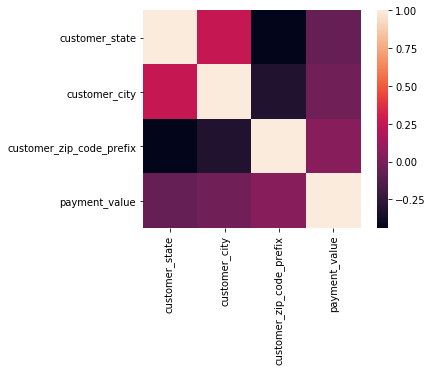

In [8]:
cor = customer_spend_power_df.corr() 
sns.heatmap(cor, square = True)

In [9]:
''' Scaling the features before performing clustering '''
ss = StandardScaler()
ss.fit_transform(customer_spend_power_df)

array([[ 0.89744298, -1.42106221, -0.91914454, -0.1050438 ],
       [ 0.89744298,  0.17853127, -0.97734171, -0.60193615],
       [ 0.61516384,  0.94244234,  1.77685409, -0.34623433],
       ...,
       [-0.93737139,  1.12393309,  1.45589708, -0.23256983],
       [-1.64306922, -1.53573137, -0.19174714, -0.14060727],
       [-0.23167356, -1.36166524,  1.62558846, -0.40973744]])

In [10]:
''' Kmeans'''
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [11]:
''' Perform Kmeans clustering'''
clust_labels, cent = doKmeans(customer_spend_power_df, 8)
kmeans = pd.DataFrame(clust_labels)
customer_spend_power_df.insert((customer_spend_power_df.shape[1]),'cluster',kmeans)

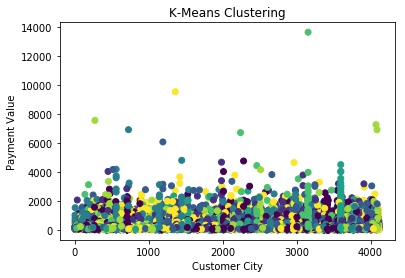

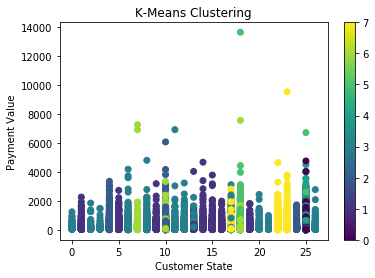

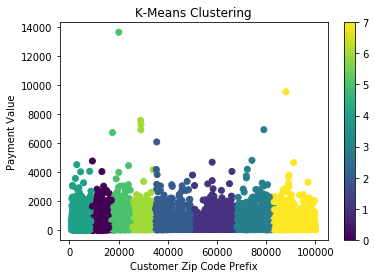

In [16]:
''' Plot the clusters obtained using k means'''
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(customer_spend_power_df['customer_city'],customer_spend_power_df['payment_value'],
                     c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Customer City')
ax.set_ylabel('Payment Value')

fig2 = plt.figure()
ax = fig2.add_subplot(111)
scatter = ax.scatter(customer_spend_power_df['customer_state'],customer_spend_power_df['payment_value'],
                     c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Customer State')
ax.set_ylabel('Payment Value')
plt.colorbar(scatter)

fig3 = plt.figure()
ax = fig3.add_subplot(111)
scatter = ax.scatter(customer_spend_power_df['customer_zip_code_prefix'],customer_spend_power_df['payment_value'],
                     c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Customer Zip Code Prefix')
ax.set_ylabel('Payment Value')
plt.colorbar(scatter)